In [1]:
# Plotting electrochemical data from Biologic data files
# Data collection cycle: Positive CP --> EIS --> Negative CP --> EIS

In [2]:
import numpy as np
import eclabfiles as ecf
import matplotlib.pyplot as plt
import pandas as pd
from colour import Color
import matplotlib.ticker as tick

%matplotlib inline

from matplotlib.pyplot import rc
rc("text", usetex=True)
rc("font", **{"family":"sans-serif","sans-serif":["Helvetica"]},size="14")
rc("text.latex",preamble=r"\usepackage{sfmath}")

In [7]:
# import data files
# ecf.to_df reads .mpr files and imports them as dataframes

# chronopotentiometry data
pos_CP = ecf.to_df(r"C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/cell5_Li2-7In0-7Zr0-3Cl6/echem_cell5/operando/In7Zr3_cell5_100uA_02_CP_C01.mpr")
neg_CP = ecf.to_df(r"C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/cell5_Li2-7In0-7Zr0-3Cl6/echem_cell5/operando/In7Zr3_cell5_100uA_04_CP_C01.mpr")

# EIS data
PEIS_A = ecf.to_df(r"C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/cell5_Li2-7In0-7Zr0-3Cl6/echem_cell5/operando/In7Zr3_cell5_100uA_03_PEIS_C01.mpr")
PEIS_B = ecf.to_df(r"C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/cell5_Li2-7In0-7Zr0-3Cl6/echem_cell5/operando/In7Zr3_cell5_100uA_05_PEIS_C01.mpr")

In [8]:
# Plotting chronopotentiometry

In [9]:
# separates each CP curve (all CP data is collected into one data file)
# "1201" value is dependent on cycle length

# counts the number of total data points
num_rows_pos = len(pos_CP)
num_rows_neg = len(neg_CP)

# calculates number of CP cycles
num_cycles_pos = int(num_rows_pos/1201)
num_cycles_neg = int(num_rows_neg/1201)

# creates lists to store separated CP cycles
CP_cycles_pos = {}
CP_cycles_neg = {}

# adds a new item to positive CP list for each individual cycle
for i in range(0, num_cycles_pos):
    CP_cycles_pos[i] = pos_CP.truncate(before=0 + (1201*i), after=1200 + (1201*i))

# adds a new item to negative CP list for each individual cycle
for i in range(0, num_cycles_neg):
    CP_cycles_neg[i] = neg_CP.truncate(before=0 + (1201*i), after=1200 + (1201*i))

# should have whole numbers here
print(num_cycles_pos)
print(num_cycles_neg)

28
28


In [10]:
# generates color gradient list with same number of colors as there are CP cycles
start_color = Color("#ff0000")
colors_cp = list(start_color.range_to(Color("#962fbf"), num_cycles_pos))

Text(-1000, -0.25, '$j=100$ $\\mu$A$\\cdot$cm$^{-2}$')

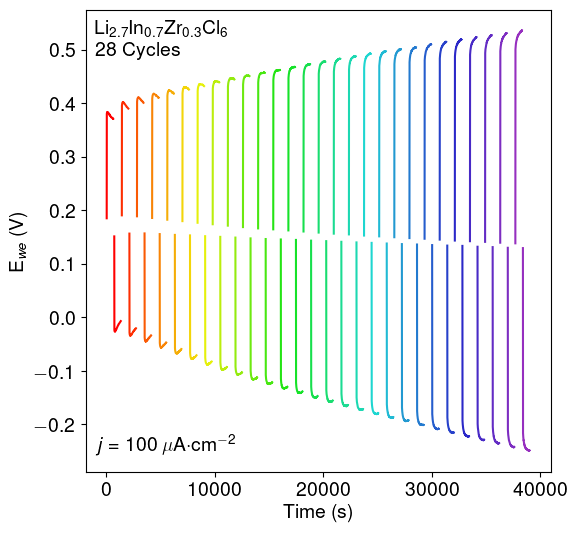

In [67]:
# generates plot
fig, cp_plot = plt.subplots(1, 1, figsize=(6,6))

# plot each positive cycle
for i in CP_cycles_pos:
    cp_plot.plot(CP_cycles_pos[i]["time"], CP_cycles_pos[i]["<Ewe>"], color = colors_cp[i].hex)

# plot each negative cycle
for i in CP_cycles_neg:
    cp_plot.plot(CP_cycles_neg[i]["time"], CP_cycles_neg[i]["<Ewe>"], color = colors_cp[i].hex)

# set axis labels
cp_plot.set_ylabel("E$_{we}$ (V)")
cp_plot.set_xlabel("Time (s)")

# set title
cp_plot.text(-1000, 0.53, "Li$_{2.7}$In$_{0.7}$Zr$_{0.3}$Cl$_6$")

# add text for number of cycles
cp_plot.text(-1000, 0.49, "28 Cycles")

# add text for current density
cp_plot.text(-1000, -0.25, "$j=100$ $\mu$A$\cdot$cm$^{-2}$")

# saves PNG image of figure
#plt.savefig("C:/Users/sincl/Desktop/cell6_CP.png",bbox_inches='tight',dpi=1000) 

In [32]:
#Plotting EIS

In [34]:
# sort dataset chronologically

PEIS = PEIS_A
PEIS.sort_values(by=["time"])

,freq,Re(Z),-Im(Z),|Z|,Phase(Z),time,<Ewe>,<I>,Cs,Cp,...,|Ewe h5|,|Ewe h6|,|Ewe h7|,|I h2|,|I h3|,|I h4|,|I h5|,|I h6|,|I h7|,uts
0,2.000018e+06,455.639648,201.506470,498.209137,-23.857393,638.841313,0.189718,0.002059,0.000395,0.000065,...,0.000011,0.000008,0.000010,1.893771e-07,1.590872e-07,1.178858e-07,5.623241e-08,6.887954e-08,1.415851e-07,1.670677e+09
1,1.349892e+06,505.003906,227.801117,554.005676,-24.279556,639.708316,0.189712,0.002127,0.000518,0.000088,...,0.000021,0.000029,0.000014,1.299567e-07,1.320860e-07,1.101101e-07,1.021015e-07,6.785690e-08,5.650022e-08,1.670677e+09
2,9.111027e+05,553.455566,260.670258,611.769592,-25.219818,640.575334,0.189711,0.002173,0.000670,0.000122,...,0.000017,0.000013,0.000027,6.303472e-08,5.681491e-08,9.427752e-08,1.084624e-07,3.747647e-08,5.740477e-08,1.670677e+09
3,6.149421e+05,615.140625,298.451965,683.718933,-25.881584,641.442315,0.189716,0.002217,0.000867,0.000165,...,0.000012,0.000011,0.000012,3.580086e-08,1.293183e-07,6.336053e-08,1.490091e-07,1.189261e-07,8.974745e-08,1.670677e+09
4,4.150553e+05,688.422546,341.749542,768.582031,-26.400909,642.309320,0.189710,0.002233,0.001122,0.000222,...,0.000013,0.000025,0.000018,8.861245e-09,1.864838e-08,2.026005e-08,6.808283e-08,6.626423e-08,1.224792e-07,1.670677e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,9.640902e-01,12512.889648,283.109467,12516.091797,-1.296120,38374.469077,0.134963,-0.001664,583.106689,0.298345,...,0.000010,0.000014,0.000009,2.223439e-09,1.562952e-09,1.175665e-09,8.085043e-10,6.916639e-10,6.020203e-10,1.670715e+09
1172,6.503910e-01,12503.597656,361.181274,12508.813477,-1.654596,38381.054743,0.134966,-0.001590,677.517334,0.564857,...,0.000012,0.000006,0.000006,2.850909e-09,2.173406e-09,1.432242e-09,1.468396e-09,1.037283e-09,8.351239e-10,1.670715e+09
1173,4.392251e-01,12506.444336,213.680069,12508.269531,-0.978837,38390.706820,0.134963,-0.001496,1695.777710,0.494883,...,0.000014,0.000006,0.000008,3.747541e-09,2.438638e-09,1.892404e-09,1.531408e-09,1.225010e-09,1.075569e-09,1.670715e+09
1174,2.964899e-01,12723.993164,127.092216,12724.627930,-0.572274,38404.905724,0.134972,-0.001378,4223.682617,0.421346,...,0.000010,0.000005,0.000005,4.783132e-09,2.815901e-09,2.436585e-09,2.146473e-09,1.561362e-09,1.372354e-09,1.670715e+09


In [35]:
# separate cycles

# counts the number of total data points
num_rows = len(PEIS)

# calculates number of EIS cycles
num_cycles = int(num_rows / 42)

# creates lists to store separated EIS cycles
PEIS_cycles = {}

# adds a new item to EIS list for each individual cycle
for i in range(0, num_cycles):
    PEIS_cycles[i] = PEIS.truncate(before=0 + (42*i), after=41 + (42*i))
    
# should have whole number here
print(num_cycles)

28


In [36]:
# generates color gradient list with same number of colors as there are EIS cycles
start_color = Color("#ff0000")
colors_eis = list(start_color.range_to(Color("#962fbf"), num_cycles))

In [37]:
def reformat_large_tick_values(tick_val, pos):
    if tick_val >= 1000:
        new_tick_format = round(tick_val/1000, 1)
    elif tick_val > -1000:
        new_tick_format = round(tick_val, 1)
    elif tick_val <= -1000:
        new_tick_format = round(tick_val/1000, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
     
    return new_tick_format

Text(9000, 7600, '$j=100$ $\\mu$A$\\cdot$cm$^{-2}$')

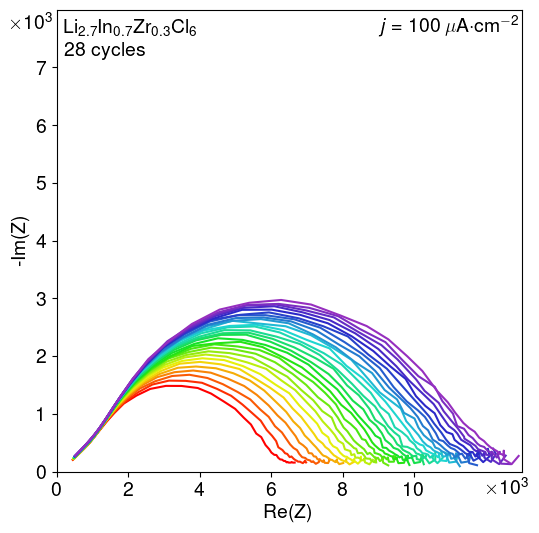

In [72]:
# generates plot
fig, eis_plot = plt.subplots(1, 1, figsize=(6,6))

# plot each EIS cycle
for i in PEIS_cycles:
    eis_plot.plot(PEIS_cycles[i]["Re(Z)"], PEIS_cycles[i]["-Im(Z)"], color = colors_eis[i].hex)

# set axis labels
eis_plot.set_ylabel("-Im(Z)")
eis_plot.set_xlabel("Re(Z)")

# set axis limits
eis_plot.set_xlim(0, 13000)
eis_plot.set_ylim(0, 8000)

# set x-axis to 10^3 scale
eis_plot.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
eis_plot.text(12000, -350, r"$\times 10^3$", color="black")
xticks = eis_plot.xaxis.get_major_ticks()
xticks[6].label1.set_visible(False)
xticks[6].set_visible(False)

# set y-axis to 10^3 scale
eis_plot.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
eis_plot.text(-1300, 7700, r"$\times 10^3$", color="black")
yticks = eis_plot.yaxis.get_major_ticks()
yticks[8].label1.set_visible(False)
yticks[8].set_visible(False)

# set title
eis_plot.text(200, 7600, "Li$_{2.7}$In$_{0.7}$Zr$_{0.3}$Cl$_6$")

# add text for number of cycles
eis_plot.text(200, 7200, "28 cycles")

# add text for current density
eis_plot.text(9000, 7600, "$j=100$ $\mu$A$\cdot$cm$^{-2}$")

# saves PNG image of figure
#plt.savefig("C:/Users/sincl/Desktop/cell10_EIS.png",bbox_inches='tight',dpi=1000) 